<a href="https://colab.research.google.com/github/kgudalewski/grailed_sales_analysis/blob/main/Grailed_data_initial_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [307]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import statistics
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [308]:
df_main = pd.read_csv("https://raw.githubusercontent.com/kgudalewski/grailed_sales_analysis/main/grailed_analysis_df.csv",encoding="utf-16").drop(columns="Unnamed: 0")
df_main.head()

,title,link,size,condition,color,seller_name,designers,description,num_of_photos,num_of_tags,measurements,location,shipping_price,price,sold_price
0,BMW racing rare archive bomber 90s,https://www.grailed.com/listings/33705557-bmw-...,Men's / US XS / EU 42 / 0,Used,Black,Humanraceeei,Bmw × Formula Uno × Racing,bargaining is appropriate,2.0,0.0,0.0,Europe,10.00,28.0,NaN
1,Mens Bomber Jacket Racing BMW F1 Size XL,https://www.grailed.com/listings/32948063-bmw-...,Men's / US XL / EU 56 / 4,Used,Blue,Casual_VntShop,Bmw × Racing × Vintage,Please see all photos\nBMW\nSize XL\nGood Vint...,9.0,0.0,1.0,Europe,21.43,45.0,NaN
2,BMW E36 Jacket,https://www.grailed.com/listings/42982572-bmw-...,Men's / US M / EU 48-50 / 2,Gently Used,Blue,beaubier32,Bmw,BMW E36 Jacket\nFits like mens size medium\nVe...,5.0,0.0,0.0,US,NaN,35.0,NaN
3,Vintage BMW Racing Jacket Williams F1 Team Hoo...,https://www.grailed.com/listings/42929894-bmw-...,Men's / US XL / EU 56 / 4,Gently Used,Blue white,DealHand,Bmw × Formula Uno × Vintage,BMW Racing Jacket F1 Team\n2003 s Vintage Mode...,16.0,10.0,1.0,Europe,NaN,50.0,NaN
4,y2k BMW Zip up Jacket,https://www.grailed.com/listings/42583439-bmw-...,Men's / US XL / EU 56 / 4,Gently Used,Black,hightailvinta5695,Bmw × Streetwear × Vintage,*Measurements in Images*\nPlease Review all ph...,7.0,0.0,1.0,US,21.43,45.0,NaN


In [309]:
pd.DataFrame(df_main.groupby(by='seller_name').sold_price.mean().sort_values(ascending = False)[:120]).rename(columns={"sold_price":"sold_price_mean"})

,sold_price_mean
seller_name,
kaithompsen,2580.000000
TheJacketKing,1100.000000
Sincewhenwasthat,840.000000
eddie808,828.000000
eggcafe_,808.000000
...,...
onseam,275.000000
Vadic,275.000000
KCsupremesales,275.000000


In [310]:
print("I'm in",round((120 / 2744)*100, 2),"% most expensive selling sellers")

I'm in 4.37 % most expensive selling sellers


In [311]:
# list_of_sellers_with_higher_mean = df.groupby(by='seller_name').sold_price.mean().sort_values(ascending = False)[:120].index.to_list()

In [312]:
# pd.DataFrame(df.seller_name.loc[df.price.isna()].value_counts()[list_of_sellers_with_higher_mean].sort_values(ascending=False)).rename(columns = {"seller_name":"number_of_sales"})

In [313]:
# df.seller_name.loc[df.price.isna()].value_counts()[list_of_sellers_with_higher_mean].sort_values(ascending=False).value_counts()

In [314]:
# print("While most of sellers with higher average sold price have only 1 item sold")

In [315]:
pd.DataFrame(df_main.seller_name.loc[df_main.price.isna()].value_counts()).rename(columns={"seller_name":"number_of_sales"})

,number_of_sales
WinampVintage,245
Merchandise_Vtg,195
VintageRacingStuff,149
newy_store,52
ClochardDeluxe,48
...,...
luciagonzo0,1
NataZuza,1
NO_INTRODUCTIONS,1
hypepriestx,1


In [316]:
print("And simultaneously in top 3 most often selling sellers")

And simultaneously in top 3 most often selling sellers


In [317]:
pd.DataFrame(df_main.groupby(by="seller_name").sold_price.sum().sort_values(ascending=False)).rename(columns={"sold_price":"total_revenue"})

,total_revenue
seller_name,
VintageRacingStuff,40752.0
WinampVintage,26282.0
Merchandise_Vtg,19736.0
ClochardDeluxe,7976.0
newy_store,7458.0
...,...
SoivStore,0.0
Solo_Store,0.0
Somich,0.0


In [318]:
print("This makes me seller with the highest revenue, which cames from selling racing jackets")

This makes me seller with the highest revenue, which cames from selling racing jackets


#Data pre processing


In [319]:
df = df_main.drop(columns=["title","link","seller_name",])
df.head()

,size,condition,color,designers,description,num_of_photos,num_of_tags,measurements,location,shipping_price,price,sold_price
0,Men's / US XS / EU 42 / 0,Used,Black,Bmw × Formula Uno × Racing,bargaining is appropriate,2.0,0.0,0.0,Europe,10.00,28.0,NaN
1,Men's / US XL / EU 56 / 4,Used,Blue,Bmw × Racing × Vintage,Please see all photos\nBMW\nSize XL\nGood Vint...,9.0,0.0,1.0,Europe,21.43,45.0,NaN
2,Men's / US M / EU 48-50 / 2,Gently Used,Blue,Bmw,BMW E36 Jacket\nFits like mens size medium\nVe...,5.0,0.0,0.0,US,NaN,35.0,NaN
3,Men's / US XL / EU 56 / 4,Gently Used,Blue white,Bmw × Formula Uno × Vintage,BMW Racing Jacket F1 Team\n2003 s Vintage Mode...,16.0,10.0,1.0,Europe,NaN,50.0,NaN
4,Men's / US XL / EU 56 / 4,Gently Used,Black,Bmw × Streetwear × Vintage,*Measurements in Images*\nPlease Review all ph...,7.0,0.0,1.0,US,21.43,45.0,NaN


# shipping price issue


<Axes: xlabel='shipping_price', ylabel='Count'>

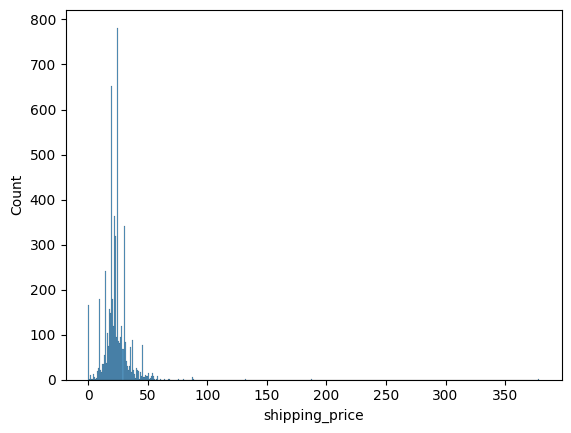

In [320]:
sns.histplot(data = df, x="shipping_price")

In [321]:
new_df = pd.DataFrame({'shipping_price': [60 if price > 60 else price for price in df.shipping_price]})
df.update(new_df)

In [322]:
new_df = pd.DataFrame({'shipping_price': [10 if price < 10 else price for price in df.shipping_price]})
df.update(new_df)

<Axes: xlabel='shipping_price', ylabel='Count'>

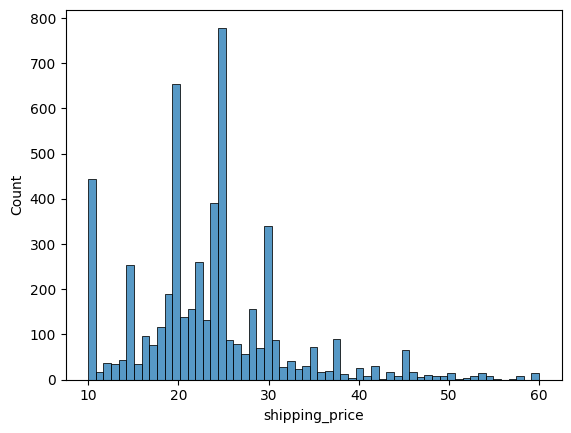

In [323]:
sns.histplot(data = df, x="shipping_price")

In [324]:
df.shipping_price.isna().value_counts()

True     10159
False     5350
Name: shipping_price, dtype: int64

In [325]:
#replace missing values by average shipping price
mean_shipping_price = df.shipping_price.mean()
df.shipping_price = df.shipping_price.fillna(mean_shipping_price)

In [326]:
df.shipping_price.isna().value_counts()

False    15509
Name: shipping_price, dtype: int64

# price issue

<Axes: xlabel='price', ylabel='Count'>

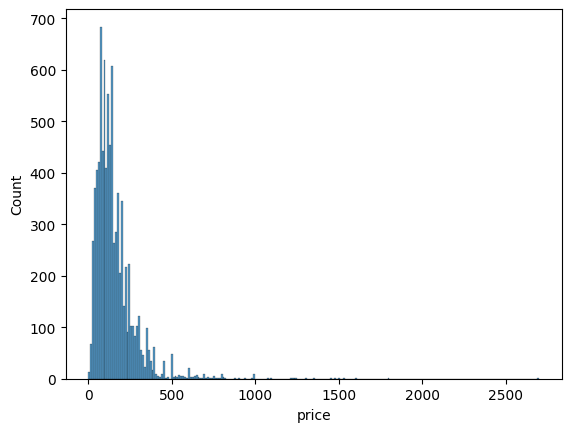

In [327]:
sns.histplot(df.price)

<Axes: xlabel='price', ylabel='Count'>

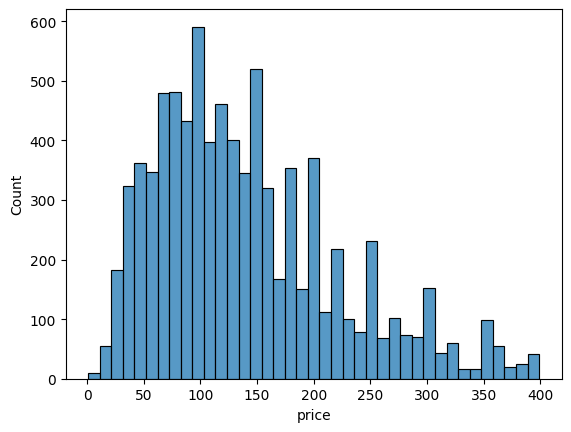

In [328]:
sns.histplot(df.loc[df.price < 400].price)

In [329]:
new_df = pd.DataFrame({'price': [400 if price > 400 else price for price in df.price]})
df.update(new_df)
new_df = pd.DataFrame({'price': [20 if price < 20 else price for price in df.price]})
df.update(new_df)

<Axes: xlabel='price', ylabel='Count'>

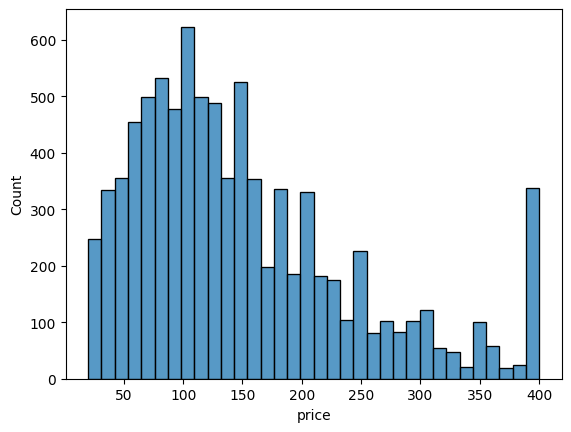

In [330]:
sns.histplot(df.price)

# sold price issue

<Axes: xlabel='sold_price', ylabel='Count'>

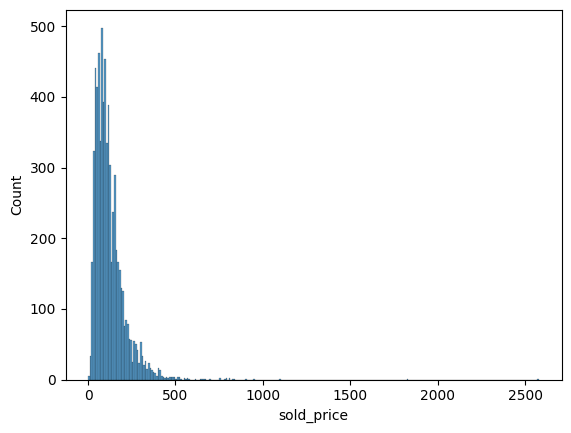

In [331]:
sns.histplot(df.sold_price)

<Axes: xlabel='sold_price', ylabel='Count'>

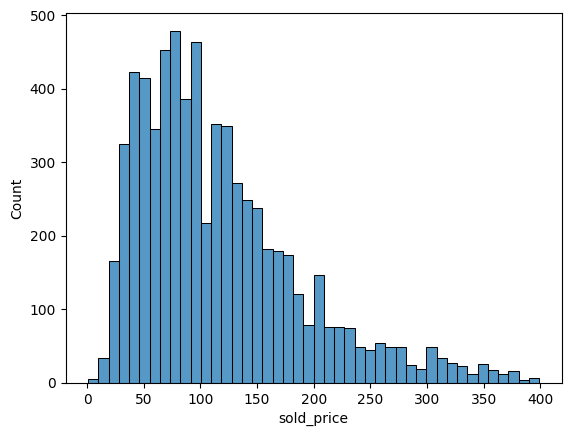

In [332]:
sns.histplot(df.loc[df.sold_price < 400].sold_price)

In [333]:
new_df = pd.DataFrame({'sold_price': [400 if price > 400 else price for price in df.sold_price]})
df.update(new_df)
new_df = pd.DataFrame({'sold_price': [20 if price < 20 else price for price in df.sold_price]})
df.update(new_df)

<Axes: xlabel='sold_price', ylabel='Count'>

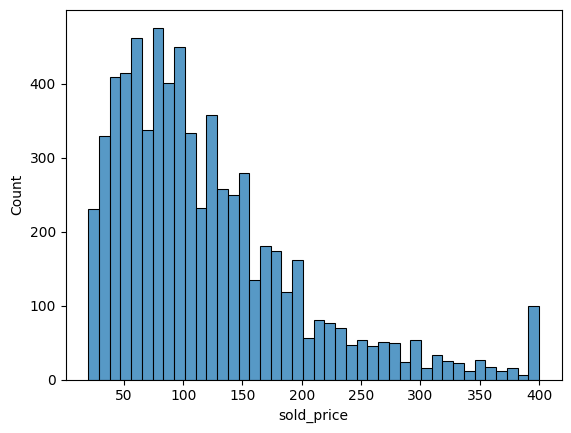

In [334]:
sns.histplot(df.sold_price)

In [335]:
df.head()

,size,condition,color,designers,description,num_of_photos,num_of_tags,measurements,location,shipping_price,price,sold_price
0,Men's / US XS / EU 42 / 0,Used,Black,Bmw × Formula Uno × Racing,bargaining is appropriate,2.0,0.0,0.0,Europe,10.000000,28.0,NaN
1,Men's / US XL / EU 56 / 4,Used,Blue,Bmw × Racing × Vintage,Please see all photos\nBMW\nSize XL\nGood Vint...,9.0,0.0,1.0,Europe,21.430000,45.0,NaN
2,Men's / US M / EU 48-50 / 2,Gently Used,Blue,Bmw,BMW E36 Jacket\nFits like mens size medium\nVe...,5.0,0.0,0.0,US,23.614011,35.0,NaN
3,Men's / US XL / EU 56 / 4,Gently Used,Blue white,Bmw × Formula Uno × Vintage,BMW Racing Jacket F1 Team\n2003 s Vintage Mode...,16.0,10.0,1.0,Europe,23.614011,50.0,NaN
4,Men's / US XL / EU 56 / 4,Gently Used,Black,Bmw × Streetwear × Vintage,*Measurements in Images*\nPlease Review all ph...,7.0,0.0,1.0,US,21.430000,45.0,NaN


# size issue

In [336]:
df["size"] = df["size"].str.split("/").apply(lambda x:x[1].split(" ")).apply(lambda x:x[2].strip())
df = df.astype({"size":"category"})

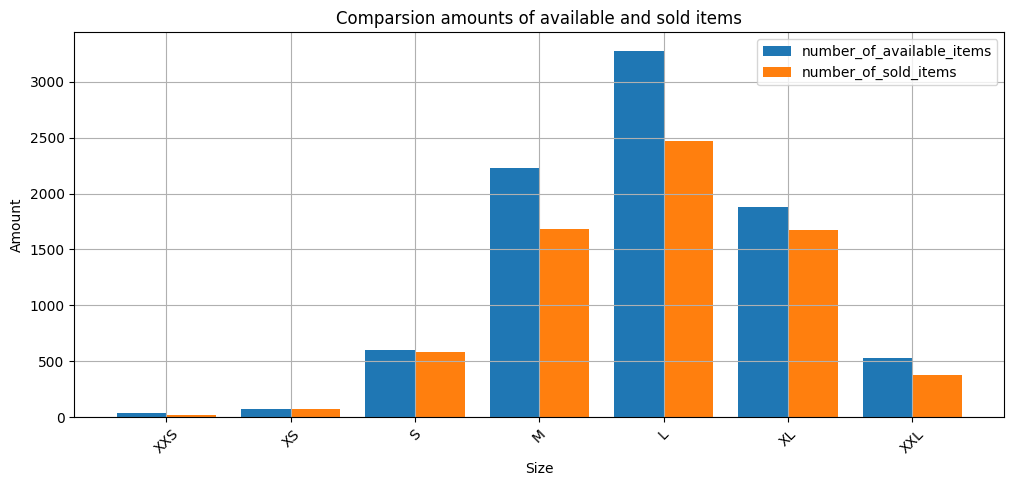

,total_number_of_items,number_of_available_items,number_of_sold_items,amount_potential_factor
XS,143,71,72,1.014085
S,1187,600,587,0.978333
XL,3562,1884,1678,0.890658
M,3909,2226,1683,0.756065
L,5745,3279,2466,0.752059
XXL,905,532,373,0.701128
XXS,58,37,21,0.567568


In [337]:
df_size_count = pd.DataFrame(df["size"].value_counts()).reindex(["XXS","XS","S","M","L","XL","XXL"]).rename(columns = {"size" : "total_number_of_items"})
df_size_count["number_of_available_items"] = pd.DataFrame(df.loc[df.price.notna()]["size"].value_counts()).reindex(["XXS","XS","S","M","L","XL","XXL"])
df_size_count["number_of_sold_items"] = pd.DataFrame(df.loc[df.sold_price.notna()]["size"].value_counts()).reindex(["XXS","XS","S","M","L","XL","XXL"])

df_size_count["amount_potential_factor"] = df_size_count.iloc[:,2] / df_size_count.iloc[:,1]
#amount_potential_factor tells possible need for size based on relation between number of sold listings and available (if there's high number of sold listings and small number of available listings, items in this size have potential)

df_size_count = df_size_count.reindex(["XXS","XS","S","M","L","XL","XXL"])

plt.figure(figsize=(12,5))
X_axis = np.arange(7)
plt.bar(X_axis - 0.2, df_size_count.number_of_available_items, 0.4, label = 'number_of_available_items')
plt.bar(X_axis + 0.2, df_size_count.number_of_sold_items, 0.4, label = 'number_of_sold_items')
plt.xticks(X_axis, df_size_count.index, rotation=45)
plt.grid()
plt.title("Comparsion amounts of available and sold items")
plt.ylabel("Amount")
plt.xlabel("Size")
plt.legend()
plt.show()

df_size_count = df_size_count.sort_values(by="amount_potential_factor",ascending=False)

display(df_size_count)

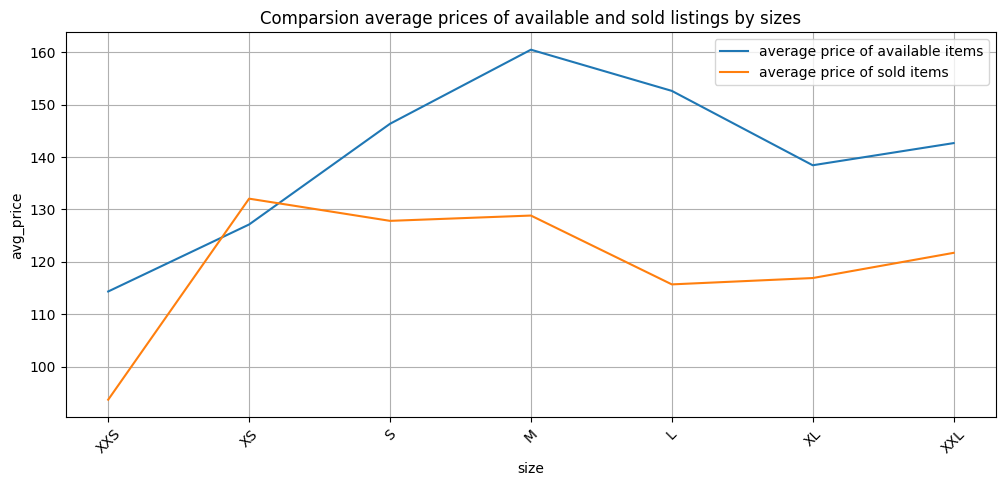

,avg_price,avg_sold_price,current_listings_factor,sold_listings_factor,overprice_factor,price_potential_factor
size,,,,,,
XS,127.112676,132.041667,0.845685,1.095489,0.771970,1.295387
S,146.333333,127.804089,0.972966,1.065162,0.913443,1.094759
XXL,142.646617,121.699732,0.947142,1.009181,0.938526,1.065501
XL,138.416667,116.889750,0.902416,0.959163,0.940837,1.062884
XXS,114.324324,93.666667,0.760789,0.775802,0.980648,1.019734
M,160.474843,128.816399,1.095275,1.091583,1.003383,0.996629
L,152.613297,115.678021,1.027102,0.937182,1.095947,0.912453


In [338]:
df1 = pd.DataFrame(df.groupby(by="size").price.mean()).rename(columns={"price" : "avg_price"})
df1["avg_sold_price"] = df.groupby(by="size").sold_price.mean().values

#current_listings_factor tells how actually expensive is size due to the rest of size

curr_list_fact_list = []
for size in df1.index:
  curr_list_fact_list.append(df.loc[df["size"] == size].price.mean() / df.loc[df["size"] != size].price.mean())
df1["current_listings_factor"] = curr_list_fact_list

#sold_listings_factor tells how expensive size sells due to the rest of size
sold_list_fact_list = []
for size in df1.index:
  sold_list_fact_list.append(df.loc[df["size"] == size].sold_price.mean() / df.loc[df["size"] != size].sold_price.mean())
df1["sold_listings_factor"] = sold_list_fact_list

#overprice_factor tells how much color is overpriced based on relation between sold and current listings (if there's high average price for color in current listings and low in sold listings,color is actually overpriced)
df1["overprice_factor"] = df1["current_listings_factor"] / df1["sold_listings_factor"]

#price_potential_factor tells how much potential has color got based on relation between sold and current listings (if there's low average price for color in current listings and high in sold listings,color is actually with price increase potential)
df1["price_potential_factor"] = df1["sold_listings_factor"] / df1["current_listings_factor"]

df1 = df1.reindex(["XXS","XS","S","M","L","XL","XXL"])

plt.figure(figsize=(12,5))
sns.lineplot(data=df1, x=df1.index,y="avg_price",label="average price of available items")
sns.lineplot(data = df1,x=df1.index,y="avg_sold_price",label="average price of sold items")
plt.title("Comparsion average prices of available and sold listings by sizes")
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.show()

df1 = df1.sort_values(by = "price_potential_factor",ascending = False)

display(df1)

In [340]:
df_factors = pd.concat([df_size_count.loc[:,["amount_potential_factor"]],df1.loc[:,["price_potential_factor"]]], axis = 1)

scaler = MinMaxScaler()

df_factors.amount_potential_factor = scaler.fit_transform(df_factors)[:,0]
df_factors.price_potential_factor = scaler.fit_transform(df_factors)[:,1]

df_factors["total_potential_factor"] = 2 * ( df_factors.amount_potential_factor * df_factors.price_potential_factor ) / ( df_factors.amount_potential_factor + df_factors.price_potential_factor )

df_factors = df_factors.sort_values(by = "total_potential_factor", ascending = False)
df_factors

,amount_potential_factor,price_potential_factor,total_potential_factor
XS,1.000000,1.000000,1.000000
S,0.919933,0.476076,0.627443
XL,0.723580,0.392838,0.509217
XXL,0.299116,0.399672,0.342159
M,0.422150,0.219818,0.289099
L,0.413178,0.000000,0.000000
XXS,0.000000,0.280155,0.000000


# condition issue

In [297]:
df = df.astype({"condition":"category"})

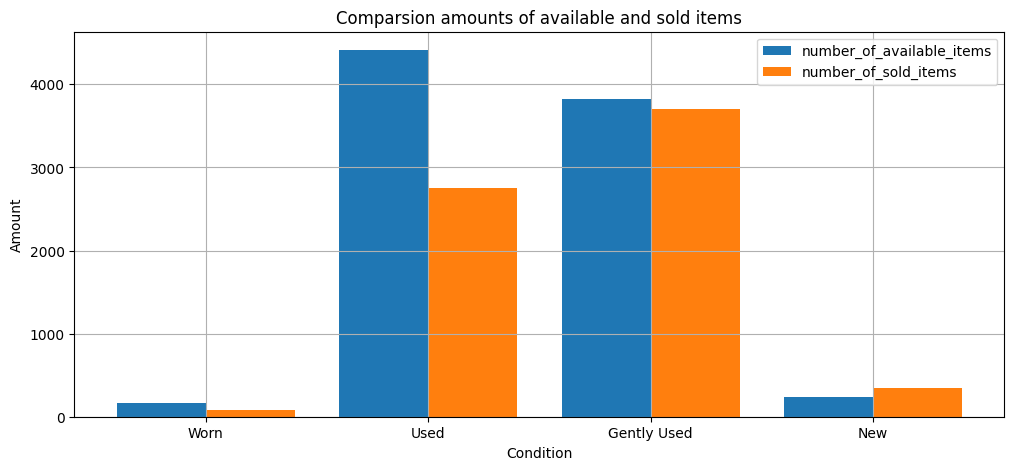

,total_number_of_items,number_of_available_items,number_of_sold_items,amount_potential_factor
New,574,234,340,1.452991
Gently Used,7521,3820,3701,0.968848
Used,7170,4412,2758,0.625113
Worn,244,163,81,0.496933


In [298]:
df_condition_count = pd.DataFrame(df["condition"].value_counts()).reindex(["Worn","Used","Gently Used","New"]).rename(columns = {"condition" : "total_number_of_items"})
df_condition_count["number_of_available_items"] = pd.DataFrame(df.loc[df.price.notna()]["condition"].value_counts()).reindex(["Worn","Used","Gently Used","New"])
df_condition_count["number_of_sold_items"] = pd.DataFrame(df.loc[df.sold_price.notna()]["condition"].value_counts()).reindex(["Worn","Used","Gently Used","New"])

df_condition_count["amount_potential_factor"] = df_condition_count.iloc[:,2] / df_condition_count.iloc[:,1]
#amount_potential_factor tells possible need for condition based on relation between number of sold listings and available (if there's high number of sold listings and small number of available listings, items in this condition have potential)

df_condition_count = df_condition_count.reindex(["Worn","Used","Gently Used","New"])

plt.figure(figsize=(12,5))
X_axis = np.arange(4)
plt.bar(X_axis - 0.2, df_condition_count.number_of_available_items, 0.4, label = 'number_of_available_items')
plt.bar(X_axis + 0.2, df_condition_count.number_of_sold_items, 0.4, label = 'number_of_sold_items')
plt.xticks(X_axis, df_condition_count.index)
plt.grid()
plt.title("Comparsion amounts of available and sold items")
plt.ylabel("Amount")
plt.xlabel("Condition")
plt.legend()
plt.show()

df_condition_count = df_condition_count.sort_values(by="amount_potential_factor",ascending=False)

display(df_condition_count)

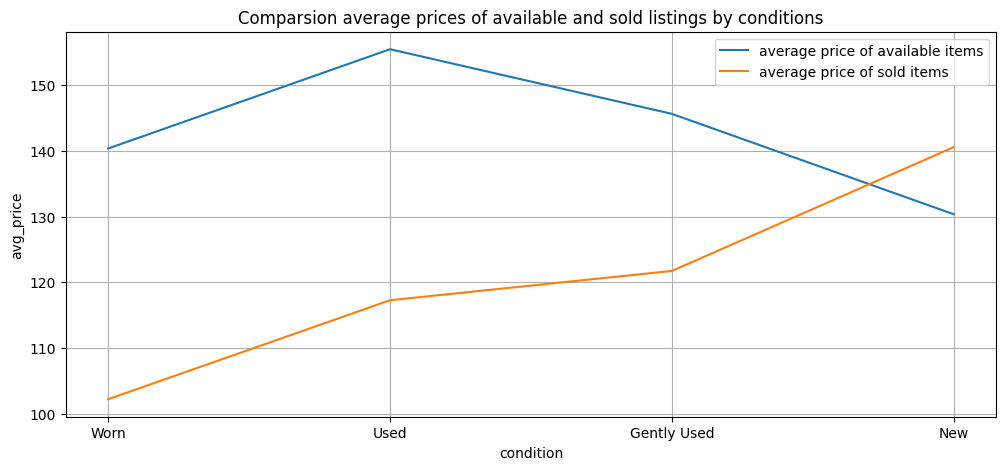

,avg_price,avg_sold_price,current_listings_factor,sold_listings_factor,overprice_factor,price_potential_factor
condition,,,,,,
New,130.358974,140.544118,0.865211,1.174936,0.736390,1.357977
Gently Used,145.609948,121.735207,0.947387,1.019624,0.929153,1.076249
Worn,140.343558,102.246914,0.933727,0.845911,1.103811,0.905952
Used,155.427471,117.288252,1.075175,0.954310,1.126652,0.887586


In [299]:
df1 = pd.DataFrame(df.groupby(by="condition").price.mean()).rename(columns={"price" : "avg_price"})
df1["avg_sold_price"] = df.groupby(by="condition").sold_price.mean().values

#current_listings_factor tells how actually expensive is size due to the rest of size

curr_list_fact_list = []
for cond in df1.index:
  curr_list_fact_list.append(df.loc[df["condition"] == cond].price.mean() / df.loc[df["condition"] != cond].price.mean())
df1["current_listings_factor"] = curr_list_fact_list

#sold_listings_factor tells how expensive size sells due to the rest of size
sold_list_fact_list = []
for cond in df1.index:
  sold_list_fact_list.append(df.loc[df["condition"] == cond].sold_price.mean() / df.loc[df["condition"] != cond].sold_price.mean())
df1["sold_listings_factor"] = sold_list_fact_list

#overprice_factor tells how much color is overpriced based on relation between sold and current listings (if there's high average price for color in current listings and low in sold listings,color is actually overpriced)
df1["overprice_factor"] = df1["current_listings_factor"] / df1["sold_listings_factor"]

#price_potential_factor tells how much potential has color got based on relation between sold and current listings (if there's low average price for color in current listings and high in sold listings,color is actually with price increase potential)
df1["price_potential_factor"] = df1["sold_listings_factor"] / df1["current_listings_factor"]

df1 = df1.reindex(["Worn","Used","Gently Used","New"])

plt.figure(figsize=(12,5))
sns.lineplot(data=df1, x=df1.index,y="avg_price",label="average price of available items")
sns.lineplot(data = df1,x=df1.index,y="avg_sold_price",label="average price of sold items")
plt.title("Comparsion average prices of available and sold listings by conditions")
plt.grid()
plt.legend()
plt.show()

df1 = df1.sort_values(by = "price_potential_factor",ascending = False)

display(df1)

In [300]:
df_factors = pd.concat([df_condition_count.loc[:,["amount_potential_factor"]],df1.loc[:,["price_potential_factor"]]], axis = 1)

# scaler = MinMaxScaler()

# df_factors.amount_potential_factor = scaler.fit_transform(df_factors)[:,0]
# df_factors.price_potential_factor = scaler.fit_transform(df_factors)[:,1]

df_factors["total_potential_factor"] = 2 * ( df_factors.amount_potential_factor * df_factors.price_potential_factor ) / ( df_factors.amount_potential_factor + df_factors.price_potential_factor )

df_factors = df_factors.sort_values(by = "total_potential_factor", ascending = False)
df_factors

,amount_potential_factor,price_potential_factor,total_potential_factor
New,1.452991,1.357977,1.403878
Gently Used,0.968848,1.076249,1.019728
Used,0.625113,0.887586,0.733578
Worn,0.496933,0.905952,0.641816


# color issue

In [301]:
df.color = df.color.str.lower().str.strip()
df.color = df.color.str.split("/").apply(lambda x:[color.strip() for color in x])
df.color = df.color.apply(lambda x:[color.split(" ") for color in x])
df.color = df.color.apply(lambda x:[color[0] for color in x])
df.color = df.color.apply(lambda x:[color.split('\\') for color in x])
df.color = df.color.apply(lambda x:[color[0] for color in x])
list_of_errors = ["multi","mix","multiple","multicolour","rainbow","mutli","colorful",'multi-color',"multicolored"]
df.color = df.color.apply(lambda x:["multicolor" if color in list_of_errors else color for color in x])
df.color = df.color.apply(lambda x:["grey" if color=="gray" else color for color in x])

In [302]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()

df_mlb_colors = pd.DataFrame(mlb.fit_transform(df.color),columns=mlb.classes_)
df_mlb_colors = df_mlb_colors.loc[:,["black","red","blue","white","multicolor","navy","brown","grey","green","yellow","orange","purple"]]

df_mlb_colors["other"] = [0 if sum != 0 else 1 for sum in df_mlb_colors.sum(axis=1)]

colors = ["color_"+name for name in df_mlb_colors.columns]
df_mlb_colors.columns = colors

df = pd.concat([df,df_mlb_colors],axis=1).drop(columns=["color"])

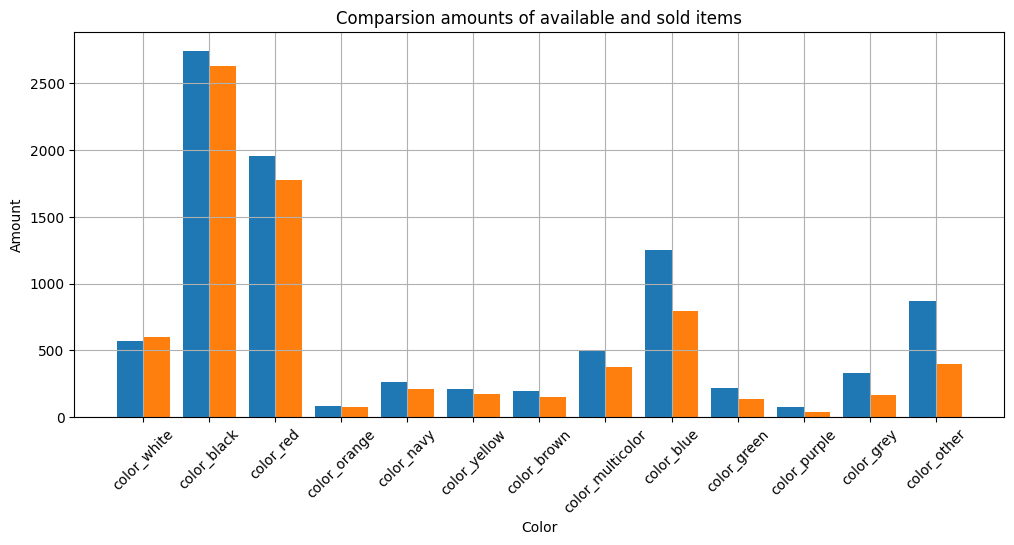

,total_number_of_items,number_of_available_items,number_of_sold_items,amount_potential_factor
color_white,1169,571,598,1.047285
color_black,5378,2746,2632,0.958485
color_red,3731,1954,1777,0.909417
color_orange,164,87,77,0.885057
color_navy,477,262,215,0.820611
color_yellow,390,215,175,0.813953
color_brown,349,197,152,0.771574
color_multicolor,879,503,376,0.747515
color_blue,2048,1252,796,0.635783
color_green,350,216,134,0.620370


In [303]:
df_colors_count = pd.DataFrame(df.loc[:,colors].sum(),columns=["total_number_of_items"])
df_colors_count["number_of_available_items"] = df.loc[df.price.notna()].loc[:,colors].sum().values
df_colors_count["number_of_sold_items"] = df.loc[df.sold_price.notna()].loc[:,colors].sum().values

df_colors_count["amount_potential_factor"] = df_colors_count.iloc[:,2] / df_colors_count.iloc[:,1]
#amount_potential_factor tells possible need for color based on relation between number of sold listings and available (if there's high number of sold listings and small number of available listings, items in this color have potential)

df_colors_count = df_colors_count.sort_values(by="amount_potential_factor",ascending=False)

plt.figure(figsize=(12,5))
X_axis = np.arange(len(colors))
plt.bar(X_axis - 0.2, df_colors_count.number_of_available_items, 0.4, label = 'number_of_available_items')
plt.bar(X_axis + 0.2, df_colors_count.number_of_sold_items, 0.4, label = 'number_of_sold_items')
plt.xticks(X_axis, df_colors_count.index, rotation=45)
plt.grid()
plt.title("Comparsion amounts of available and sold items")
plt.ylabel("Amount")
plt.xlabel("Color")
plt.show()

display(df_colors_count)

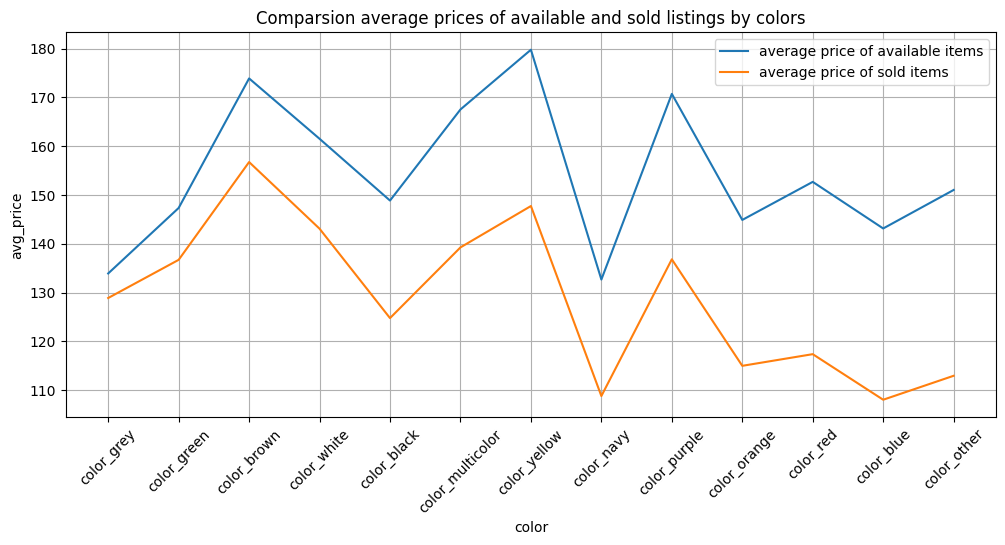

,avg_price,avg_sold_price,current_listings_factor,sold_listings_factor,overprice_factor,price_potential_factor
color,,,,,,
color_grey,133.92,128.89,0.888304,1.070127,0.830092,1.204686
color_green,147.34,136.71,0.981024,1.136082,0.863515,1.158057
color_brown,173.89,156.75,1.162657,1.308026,0.888864,1.125032
color_white,161.52,143.09,1.081763,1.207359,0.895975,1.116103
color_black,148.86,124.77,0.987796,1.056519,0.934954,1.069572
color_multicolor,167.53,139.26,1.124105,1.164564,0.965258,1.035993
color_yellow,179.77,147.74,1.203626,1.231749,0.977168,1.023366
color_navy,132.67,108.8,0.880561,0.898874,0.979626,1.020797
color_purple,170.72,136.82,1.13862,1.134871,1.003303,0.996707


In [304]:
df1 = pd.DataFrame(columns=["color","avg_price", "avg_sold_price", "current_listings_factor","sold_listings_factor"])
categories = df_colors_count.index.to_list()

for category in categories:
  factor1 = df.groupby(by=category).price.mean()[1] / df.groupby(by=category).price.mean()[0]
  factor2 = df.groupby(by=category).sold_price.mean()[1] / df.groupby(by=category).sold_price.mean()[0]
  avg_price = round(df.groupby(by=category).price.mean()[1], 2)
  avg_sold_price = round(df.groupby(by=category).sold_price.mean()[1], 2)
  df1.loc[len(df1),:] = [category, avg_price, avg_sold_price, factor1, factor2]

#current_listings_factor tells how actually expensive is color due to the rest of colors
#sold_listings_factor tells how expensive color sells due to the rest of colors

df1["overprice_factor"] = df1["current_listings_factor"] / df1["sold_listings_factor"]

#overprice_factor tells how much color is overpriced based on relation between sold and current listings (if there's high average price for color in current listings and low in sold listings,color is actually overpriced)

df1["price_potential_factor"] = df1["sold_listings_factor"] / df1["current_listings_factor"]

#price_potential_factor tells how much potential has color got based on relation between sold and current listings (if there's low average price for color in current listings and high in sold listings,color is actually with price increase potential)

df1 = df1.sort_values(by = "price_potential_factor",ascending = False).reset_index(drop=True)
df1.set_index("color",inplace=True)

plt.figure(figsize=(12,5))
sns.lineplot(data=df1, x=df1.index,y="avg_price",label="average price of available items")
sns.lineplot(data = df1,x=df1.index,y="avg_sold_price",label="average price of sold items")
plt.title("Comparsion average prices of available and sold listings by colors")
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.show()

display(df1)

In [306]:
df_factors = pd.concat([df_colors_count.loc[:,["amount_potential_factor"]],df1.loc[:,["price_potential_factor"]]], axis = 1)

scaler = MinMaxScaler()

df_factors.amount_potential_factor = scaler.fit_transform(df_factors)[:,0]
df_factors.price_potential_factor = scaler.fit_transform(df_factors)[:,1]

df_factors["total_potential_factor"] = 2 * ( df_factors.amount_potential_factor * df_factors.price_potential_factor ) / ( df_factors.amount_potential_factor + df_factors.price_potential_factor )

df_factors = df_factors.sort_values(by = "total_potential_factor", ascending = False)
df_factors

,amount_potential_factor,price_potential_factor,total_potential_factor
color_white,1.000000,0.681943,0.810899
color_black,0.848283,0.514872,0.640803
color_brown,0.528942,0.714002,0.607695
color_yellow,0.601349,0.348968,0.441646
color_navy,0.612723,0.339746,0.437117
color_multicolor,0.487838,0.394305,0.436113
color_green,0.270610,0.832581,0.408460
color_orange,0.722831,0.219403,0.336629
color_grey,0.085791,1.000000,0.158024
color_purple,0.099125,0.253252,0.142482


# designers issue

In [159]:
df.designers = df.designers.str.replace(" ","").str.split("×")

In [160]:
mlb = MultiLabelBinarizer()
mlb_designers_df = pd.DataFrame(mlb.fit_transform(df.designers),columns=mlb.classes_)

list_of_top_brands = list(mlb_designers_df.sum().sort_values(ascending=False)[:40].index)
list_of_brands_to_delete = ['Racing','MOTO','Streetwear','SportsSpecialties','GearForSports','MarlboroClassics','MarlboroAdventureTeam','Puma','MadeInUsa', 'Rare', 'BomberJacket', 'Sportswear','Workers','Dainese','Benetton','PepeJeans','VeryRare', 'ScuderiaFerrari', 'WinnersCircle']
for element in list_of_brands_to_delete:
  list_of_top_brands.remove(element)

df["vintage"] = mlb_designers_df.Vintage
list_of_top_brands.remove("Vintage")

df["leather"] = [1 if value > 0 else 0 for value in mlb_designers_df.loc[:,['LeatherJacket' ,'GenuineLeather']].sum(axis = 1).values]
list_of_top_brands.remove('LeatherJacket')
list_of_top_brands.remove('GenuineLeather')

mlb_designers_df = mlb_designers_df.loc[:,list_of_top_brands]

# mlb_designers_df["other"] = [0 if sum != 0 else 1 for sum in mlb_designers_df.sum(axis=1)]

columns_names = ["designer_"+name for name in mlb_designers_df.columns]
mlb_designers_df.columns = columns_names

In [161]:
df = pd.concat([df,mlb_designers_df],axis=1).drop(columns=["designers"])
designers = mlb_designers_df.columns.to_list()

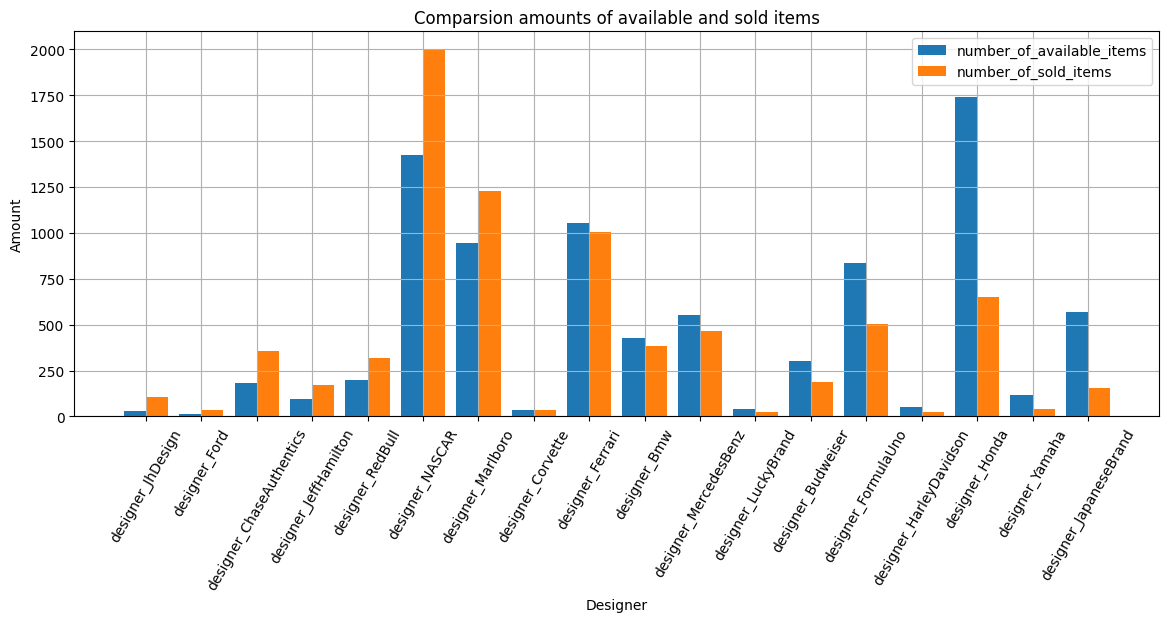

,total_number_of_listings,number_of_available_items,number_of_sold_items,amount_potential_factor
designer_JhDesign,133,27,106,3.925926
designer_Ford,47,11,36,3.272727
designer_ChaseAuthentics,541,183,358,1.956284
designer_JeffHamilton,263,94,169,1.797872
designer_RedBull,518,200,318,1.590000
designer_NASCAR,3420,1422,1998,1.405063
designer_Marlboro,2173,943,1230,1.304348
designer_Corvette,73,37,36,0.972973
designer_Ferrari,2061,1056,1005,0.951705
designer_Bmw,809,427,382,0.894614


In [162]:
df_designer_count = pd.DataFrame(df.loc[:,designers].sum(),columns=["total_number_of_listings"])
df_designer_count["number_of_available_items"] = df.loc[df.price.notna()].loc[:,designers].sum().values
df_designer_count["number_of_sold_items"] = df.loc[df.sold_price.notna()].loc[:,designers].sum().values
df_designer_count
df_designer_count["amount_potential_factor"] = df_designer_count.iloc[:,2] / df_designer_count.iloc[:,1]
#amount_potential_factor tells possible need for color based on relation between number of sold listings and available (if there's high number of sold listings and small number of available listings, items in this color have potential)

df_designer_count = df_designer_count.sort_values(by="amount_potential_factor",ascending=False)

plt.figure(figsize=(14,5))
X_axis = np.arange(len(designers))
plt.bar(X_axis - 0.2, df_designer_count.number_of_available_items, 0.4, label = 'number_of_available_items')
plt.bar(X_axis + 0.2, df_designer_count.number_of_sold_items, 0.4, label = 'number_of_sold_items')
plt.xticks(X_axis, df_designer_count.index, rotation=60)
plt.grid()
plt.title("Comparsion amounts of available and sold items")
plt.ylabel("Amount")
plt.xlabel("Designer")
plt.legend()
plt.show()

display(df_designer_count)

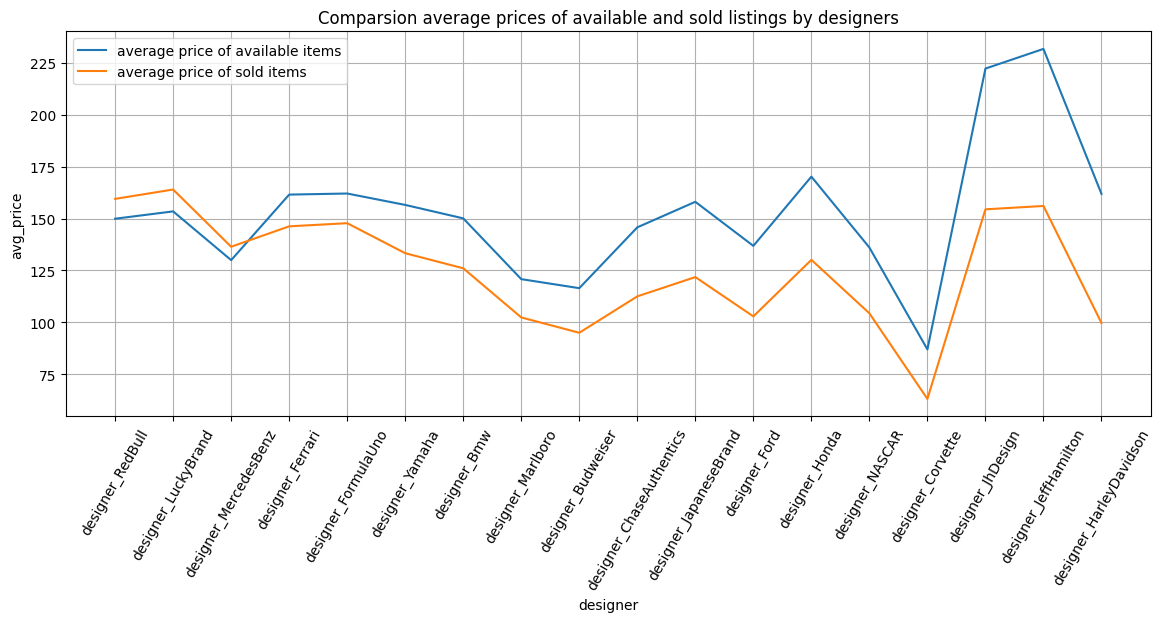

,avg_price,avg_sold_price,current_listings_factor,sold_listings_factor,overprice_factor,price_potential_factor
designer,,,,,,
designer_RedBull,149.9,159.46,0.998489,1.342593,0.743702,1.344625
designer_LuckyBrand,153.43,163.96,1.022144,1.360724,0.751176,1.331245
designer_MercedesBenz,129.95,136.4,0.857737,1.141334,0.751522,1.330634
designer_Ferrari,161.52,146.23,1.087489,1.257565,0.864758,1.156393
designer_FormulaUno,162.04,147.75,1.088685,1.246705,0.87325,1.145147
designer_Yamaha,156.55,133.29,1.043456,1.105417,0.943948,1.059381
designer_Bmw,150.07,126.03,0.999692,1.047279,0.954561,1.047602
designer_Marlboro,120.8,102.35,0.785882,0.821142,0.95706,1.044866
designer_Budweiser,116.45,94.97,0.76942,0.782485,0.983303,1.016981


In [163]:
df1 = pd.DataFrame(columns=["designer","avg_price", "avg_sold_price", "current_listings_factor","sold_listings_factor"])
categories = designers

for category in categories:
  factor1 = df.groupby(by=category).price.mean()[1] / df.groupby(by=category).price.mean()[0]
  factor2 = df.groupby(by=category).sold_price.mean()[1] / df.groupby(by=category).sold_price.mean()[0]
  avg_price = round(df.groupby(by=category).price.mean()[1], 2)
  avg_sold_price = round(df.groupby(by=category).sold_price.mean()[1], 2)
  df1.loc[len(df1),:] = [category, avg_price, avg_sold_price, factor1, factor2]

#current_listings_factor tells how actually expensive is color due to the rest of colors
#sold_listings_factor tells how expensive color sells due to the rest of colors

df1["overprice_factor"] = df1["current_listings_factor"] / df1["sold_listings_factor"]

#overprice_factor tells how much color is overpriced based on relation between sold and current listings (if there's high average price for color in current listings and low in sold listings,color is actually overpriced)

df1["price_potential_factor"] = df1["sold_listings_factor"] / df1["current_listings_factor"]

#price_potential_factor tells how much potential has color got based on relation between sold and current listings (if there's low average price for color in current listings and high in sold listings,color is actually with price increase potential)

df1 = df1.sort_values(by = "price_potential_factor",ascending = False).reset_index(drop=True)
df1.set_index("designer",inplace=True)

plt.figure(figsize=(14,5))
sns.lineplot(data=df1, x=df1.index,y="avg_price",label="average price of available items")
sns.lineplot(data = df1,x=df1.index,y="avg_sold_price",label="average price of sold items")
plt.title("Comparsion average prices of available and sold listings by designers")
plt.xticks(rotation=60)
plt.grid()
plt.legend()
plt.show()

display(df1)

In [181]:
df_factors = pd.concat([df_designer_count.loc[:,["amount_potential_factor"]],df1.loc[:,["price_potential_factor"]]], axis = 1)

scaler = MinMaxScaler()

df_factors.amount_potential_factor = scaler.fit_transform(df_factors)[:,0]
df_factors.price_potential_factor = scaler.fit_transform(df_factors)[:,1]

df_factors["total_potential_factor"] = 2 * ( df_factors.amount_potential_factor * df_factors.price_potential_factor ) / ( df_factors.amount_potential_factor + df_factors.price_potential_factor )

df_factors = df_factors.sort_values(by = "total_potential_factor", ascending = False)
df_factors

,amount_potential_factor,price_potential_factor,total_potential_factor
designer_RedBull,0.360021,1.000000,0.529434
designer_Ford,0.821042,0.292439,0.431269
designer_ChaseAuthentics,0.460373,0.331550,0.385484
designer_Marlboro,0.281760,0.482487,0.355763
designer_JhDesign,1.000000,0.175502,0.298599
designer_Ferrari,0.185146,0.675030,0.290589
designer_NASCAR,0.309353,0.268749,0.287625
designer_MercedesBenz,0.154443,0.975846,0.266680
designer_Bmw,0.169504,0.487211,0.251507
designer_Corvette,0.190973,0.236699,0.211391


# description issue

Has the length of descrition got impact on the item's price ? 

In [946]:
df.description = df.description.apply(lambda x:len(x))

In [947]:
df_desc_len_sold_price = df.loc[df.price.isna()].loc[:,["description","sold_price"]].sort_values(by="sold_price")
df_desc_len_sold_price
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
scaled_df = pd.DataFrame(std.fit_transform(df_desc_len_sold_price),columns=["description","sold_price"])
scaled_df.sold_price = scaled_df.loc[scaled_df.sold_price < 4].sold_price
scaled_df.description = scaled_df.loc[scaled_df.description < 4].description

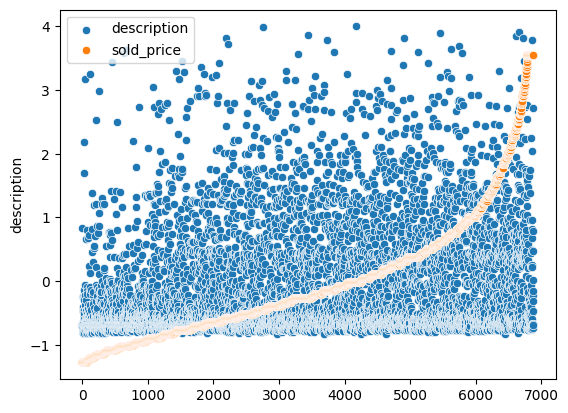

In [948]:
sns.scatterplot(x = scaled_df.index,y= scaled_df.description,label="description")
sns.scatterplot(x = scaled_df.index,y= scaled_df.sold_price,label="sold_price")
plt.legend()

In [949]:
df_desc_len_sold_price.corr("spearman")

,description,sold_price
description,1.000000,0.217726
sold_price,0.217726,1.000000


In [950]:
df_desc_len_sold_price.corr()

,description,sold_price
description,1.000000,0.140697
sold_price,0.140697,1.000000


The answer is that there is no correlation between length of description and sold price. Length of description doesn't impact sold price

In [951]:
df = df.drop(columns=["description"])

# measurements issue

In [952]:
pd.DataFrame(df.groupby(by="measurements").price.mean()).rename(columns = {"price" : "average price of current items"})

,average price of current items
measurements,
0.0,133.224652
1.0,157.065096


In [953]:
pd.DataFrame(df.groupby(by="measurements").sold_price.mean()).rename(columns = {"sold_price" : "average price of sold items"})

,average price of sold items
measurements,
0.0,106.923580
1.0,126.235739


# num_of_tags issue

Is the number of tags really matter ? 

In [954]:
num_of_tags_df = pd.DataFrame(df.groupby(by="num_of_tags").price.mean()).rename(columns = {"price": "average price"})
num_of_tags_df

,average price
num_of_tags,
0.0,146.659771
1.0,151.419048
2.0,121.388158
3.0,133.979381
4.0,143.192214
5.0,151.191379
6.0,156.908108
7.0,150.025157
8.0,145.362799


<Axes: xlabel='num_of_tags', ylabel='average price'>

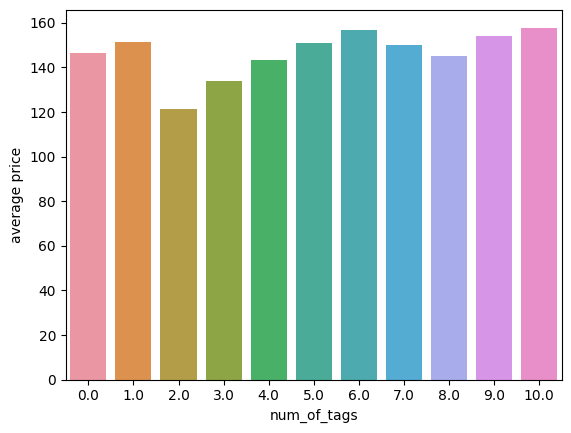

In [955]:
sns.barplot(data=num_of_tags_df, x = num_of_tags_df.index, y = "average price")

In [956]:
num_of_tags_sold_df = pd.DataFrame(df.groupby(by="num_of_tags").sold_price.mean()).rename(columns = {"sold_price": "average sold price"})
num_of_tags_sold_df

,average sold price
num_of_tags,
0.0,109.647096
1.0,109.305556
2.0,107.022727
3.0,110.991453
4.0,109.252747
5.0,122.205357
6.0,132.125806
7.0,128.702055
8.0,134.743363


<Axes: xlabel='num_of_tags', ylabel='average sold price'>

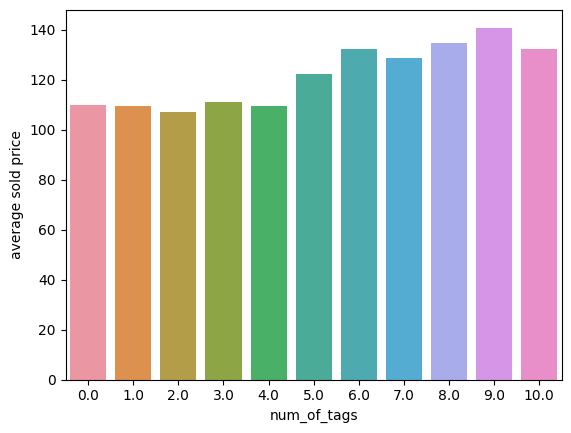

In [957]:
sns.barplot(data=num_of_tags_sold_df, x = num_of_tags_sold_df.index, y = "average sold price")

Number of tags matters. Charts show the difference between average price of sold listings with number of tags 0 and 1 and current listings with the same number of tags. Lower average price of item is when listing has less than two tags, so better is add tags to listing.

# num_of_photo issue

Is the number of photos matter ? 

In [958]:
df.num_of_photos = df.loc[df.num_of_photos > 0].num_of_photos
df.num_of_photos.value_counts()
#TODO have to delete rows with zero photo

8.0     1441
4.0     1424
9.0     1376
7.0     1366
6.0     1283
5.0     1264
10.0    1191
11.0     940
12.0     863
3.0      689
13.0     641
14.0     527
15.0     418
16.0     337
17.0     293
18.0     211
2.0      209
25.0     192
19.0     192
20.0     167
21.0     131
22.0     124
23.0     103
24.0      99
Name: num_of_photos, dtype: int64

In [959]:
num_of_photos_df = pd.DataFrame(df.groupby(by="num_of_photos").price.mean()).rename(columns = {"price": "average price"})
y1 = num_of_photos_df.iloc[:,0]
num_of_photos_df

,average price
num_of_photos,
2.0,115.330189
3.0,100.074468
4.0,116.307573
5.0,127.302694
6.0,137.210210
7.0,141.957708
8.0,147.556931
9.0,150.342893
10.0,159.447368


In [960]:
num_of_photos_df.reset_index().corr()

,num_of_photos,average price
num_of_photos,1.000000,0.943773
average price,0.943773,1.000000


In [961]:
num_of_photos_df = pd.DataFrame(df.groupby(by="num_of_photos").sold_price.mean()).rename(columns = {"sold_price": "average sold price"})
y2 = num_of_photos_df.iloc[:,0]
num_of_photos_df

,average sold price
num_of_photos,
2.0,92.388350
3.0,85.950860
4.0,96.455598
5.0,100.298578
6.0,108.423015
7.0,118.622433
8.0,126.865719
9.0,130.479094
10.0,132.081023


In [962]:
num_of_photos_df.reset_index().corr()

,num_of_photos,average sold price
num_of_photos,1.000000,0.826461
average sold price,0.826461,1.000000


Text(0.5, 1.0, 'Average price of listings per num_of_photos')

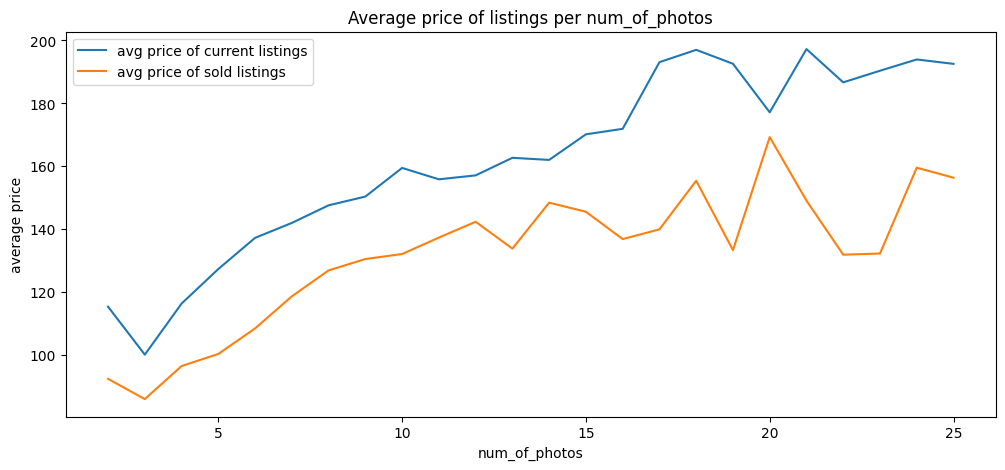

In [963]:
plt.figure(figsize = [12,5])
sns.lineplot(data=num_of_photos_df, x = num_of_photos_df.index, y = y1,label="avg price of current listings")
sns.lineplot(data=num_of_photos_df, x = num_of_photos_df.index, y = y2,label="avg price of sold listings")
plt.legend()
plt.title("Average price of listings per num_of_photos")

Number of photos has matter, there's a strong correlation between number of photos and price of item

# location issue

In [964]:
pd.DataFrame(df.groupby(by="location").shipping_price.mean()).rename(columns = {"shipping_price" : "average price of shipping"})

,average price of shipping
location,
AU,23.348004
Asia,26.597501
Canada,26.629077
Europe,20.857158
Other,22.783829
UK,25.354004
US,25.259164


In [965]:
pd.DataFrame(df.groupby(by="location").price.mean()).rename(columns = {"price" : "average price of current item"})

,average price of current item
location,
AU,162.333333
Asia,187.481374
Canada,120.219858
Europe,143.298175
Other,190.094675
UK,149.375000
US,107.907508


Text(0.5, 1.0, 'Number of current listings per region')

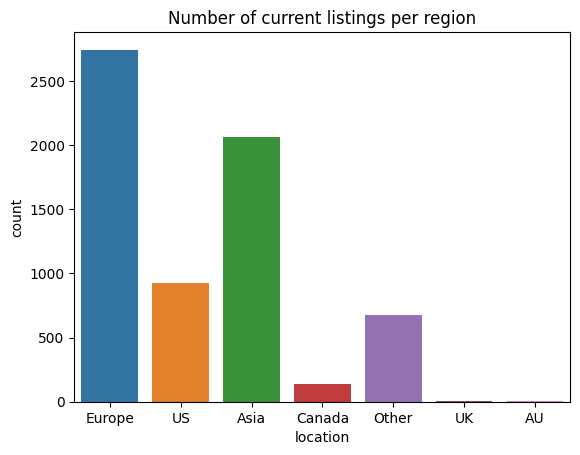

In [966]:
sns.countplot(data=df,x="location")
plt.title("Number of current listings per region")

In [967]:
df.location = df.location.astype("category")
df.dtypes

size                        category
condition                   category
num_of_photos                float64
num_of_tags                  float64
measurements                 float64
location                    category
shipping_price               float64
price                        float64
sold_price                   float64
color_black                    int64
color_red                      int64
color_blue                     int64
color_white                    int64
color_multicolor               int64
color_navy                     int64
color_brown                    int64
color_grey                     int64
color_green                    int64
color_yellow                   int64
color_orange                   int64
color_purple                   int64
color_other                    int64
vintage                        int64
leather                        int64
designer_NASCAR                int64
designer_Honda                 int64
designer_Marlboro              int64
d

# save to file

In [772]:
df.head()

,size,condition,num_of_photos,num_of_tags,measurements,location,shipping_price,price,sold_price,color_black,...,designer_ChaseAuthentics,designer_RedBull,designer_Budweiser,designer_JeffHamilton,designer_Yamaha,designer_JhDesign,designer_HarleyDavidson,designer_Corvette,designer_LuckyBrand,designer_Ford
0,XS,Used,2.0,0.0,0.0,Europe,10.000000,28.0,NaN,1,...,0,0,0,0,0,0,0,0,0,0
1,XL,Used,9.0,0.0,1.0,Europe,21.430000,45.0,NaN,0,...,0,0,0,0,0,0,0,0,0,0
2,M,Gently Used,5.0,0.0,0.0,US,23.614011,35.0,NaN,0,...,0,0,0,0,0,0,0,0,0,0
3,XL,Gently Used,16.0,10.0,1.0,Europe,23.614011,50.0,NaN,0,...,0,0,0,0,0,0,0,0,0,0
4,XL,Gently Used,7.0,0.0,1.0,US,21.430000,45.0,NaN,1,...,0,0,0,0,0,0,0,0,0,0


In [773]:
df.columns

Index(['size', 'condition', 'num_of_photos', 'num_of_tags', 'measurements',
       'location', 'shipping_price', 'price', 'sold_price', 'color_black',
       'color_red', 'color_blue', 'color_white', 'color_multicolor',
       'color_navy', 'color_brown', 'color_grey', 'color_green',
       'color_yellow', 'color_orange', 'color_purple', 'color_other',
       'vintage', 'leather', 'designer_NASCAR', 'designer_Honda',
       'designer_Marlboro', 'designer_Ferrari', 'designer_FormulaUno',
       'designer_MercedesBenz', 'designer_Bmw', 'designer_JapaneseBrand',
       'designer_ChaseAuthentics', 'designer_RedBull', 'designer_Budweiser',
       'designer_JeffHamilton', 'designer_Yamaha', 'designer_JhDesign',
       'designer_HarleyDavidson', 'designer_Corvette', 'designer_LuckyBrand',
       'designer_Ford'],
      dtype='object')

In [774]:
df.to_csv("grailed_data_ML.csv",encoding="utf-16")